<a href="https://colab.research.google.com/github/asimds/26DECOPFAIL/blob/main/application_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/application>31dec2020.csv')

In [19]:
df.head()

,active,company_name,company_type,created_at,dob,education,fathers_name,fee_paid,from_where,id,income_range,income_type,kids,marital_status,picture_id,product,rejected_at,residence,status,user_id,work_experience,experiment_id
0,True,NaN,NaN,2021-12-17T14:05:03.353437+05:30,NaN,NaN,NaN,NaN,NaN,576495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pan,636562,NaN,6
1,True,Future Generali India Insurance,NaN,2021-02-05T01:14:10.037921+05:30,NaN,NaN,NaN,NaN,Social Media,267172,NaN,salaried,NaN,NaN,NaN,secured_card,NaN,NaN,secured_card_payment,331820,NaN,8
2,True,POLARIS FINANCIAL TECHNOLOGY LIMITED,NaN,2021-01-14T20:40:04.085739+05:30,NaN,NaN,NaN,NaN,Friends,244165,NaN,salaried,NaN,NaN,NaN,secured_card,NaN,NaN,secured_card_payment,307649,NaN,8
3,True,satin creditcare network limited,private,2021-11-24T16:30:48.017869+05:30,NaN,graduate,Ranjeet Tomar,NaN,NaN,513012,12000.0,salaried,none,single,NaN,automated,NaN,parent,contacts,580355,28.0,7
4,True,Sabji Mandi,NaN,2021-01-05T06:33:09.082078+05:30,NaN,NaN,NaN,NaN,Friends,230835,NaN,salaried,NaN,NaN,NaN,secured_card,NaN,NaN,secured_card_payment,292508,NaN,8


In [20]:
df.isnull().sum() 

active                  0
company_name       254047
company_type       282155
created_at              0
dob                365898
education          282155
fathers_name       282155
fee_paid           365898
from_where         328697
id                      0
income_range       282155
income_type        253890
kids               282155
marital_status     282155
picture_id         365898
product            126600
rejected_at        365898
residence          282155
status                  0
user_id                 0
work_experience    282155
experiment_id           0
dtype: int64

In [21]:
df.shape

(365898, 22)

In [22]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')

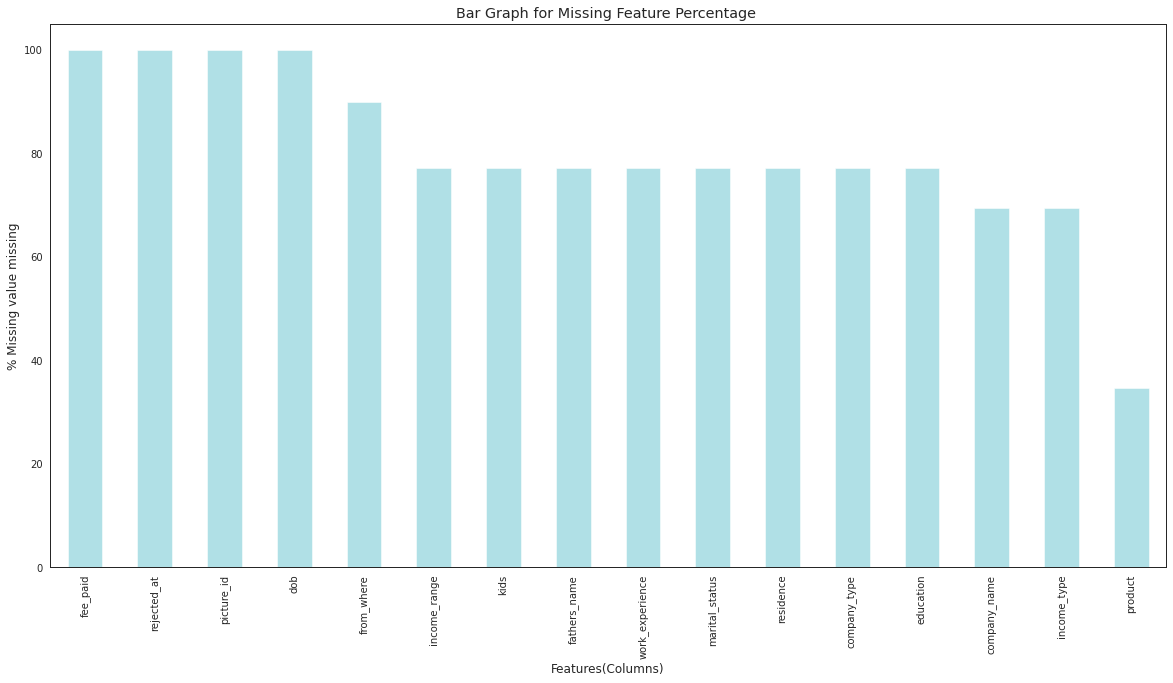

In [23]:
# Plot all the Missing Values in Decending Order
%matplotlib inline
missing_values = ((df.isna().sum())/df.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)
missing_values = missing_values.drop(missing_values[missing_values == 0].index)

color=['powderblue']

plt.figure(figsize=(20,10))
missing_values.plot.bar(color = color)
plt.xlabel('Features(Columns)')
plt.ylabel('% Missing value missing')
plt.title('Bar Graph for Missing Feature Percentage ')

plt.show()

In [24]:
df.columns

Index(['active', 'company_name', 'company_type', 'created_at', 'dob',
       'education', 'fathers_name', 'fee_paid', 'from_where', 'id',
       'income_range', 'income_type', 'kids', 'marital_status', 'picture_id',
       'product', 'rejected_at', 'residence', 'status', 'user_id',
       'work_experience', 'experiment_id'],
      dtype='object')

In [25]:
#removing unnecessary columns
unnecessary = [ 'active','company_name', 'company_type',  'dob',
       'education', 'fathers_name', 'fee_paid', 'from_where', 
       'income_range', 'income_type', 'kids', 'marital_status', 'picture_id',
       'product', 'rejected_at', 'residence', 
       'work_experience']

df.drop(unnecessary,axis=1,inplace=True)

In [26]:
df.status.value_counts()

secured_card_payment      118891
pan                       100114
aadhaar                    45902
credit_history_payment     44996
approved                   30240
processing                 15222
contacts                    5404
personal                    3084
agreement                   2042
archived                       3
Name: status, dtype: int64

In [27]:
df.shape

(365898, 5)

In [28]:
df.columns

Index(['created_at', 'id', 'status', 'user_id', 'experiment_id'], dtype='object')

created_at       0
id               0
status           0
user_id          0
experiment_id    0
dtype: int64

In [30]:
df.head()

,created_at,id,status,user_id,experiment_id
0,2021-12-17T14:05:03.353437+05:30,576495,pan,636562,6
1,2021-02-05T01:14:10.037921+05:30,267172,secured_card_payment,331820,8
2,2021-01-14T20:40:04.085739+05:30,244165,secured_card_payment,307649,8
3,2021-11-24T16:30:48.017869+05:30,513012,contacts,580355,7
4,2021-01-05T06:33:09.082078+05:30,230835,secured_card_payment,292508,8


In [31]:
df['created_at'] = df['created_at'].apply(pd.to_datetime)

In [32]:
df.sort_values(by=['created_at'], inplace=True, ascending=True)

In [33]:
df.head()

,created_at,id,status,user_id,experiment_id
315900,2021-01-01 00:00:41.043716+05:30,223308,secured_card_payment,284129,8
34485,2021-01-01 00:02:09.293137+05:30,223309,credit_history_payment,284130,5
34521,2021-01-01 00:02:46.303002+05:30,223310,credit_history_payment,284131,5
67640,2021-01-01 00:04:09.928376+05:30,223311,secured_card_payment,284132,8
274626,2021-01-01 00:06:20.295250+05:30,223312,aadhaar,284133,5


In [34]:
df.reset_index(drop=True, inplace=True)

In [36]:
df.drop('created_at', axis=1, inplace=True)

In [37]:
df.head()

,id,status,user_id,experiment_id
0,223308,secured_card_payment,284129,8
1,223309,credit_history_payment,284130,5
2,223310,credit_history_payment,284131,5
3,223311,secured_card_payment,284132,8
4,223312,aadhaar,284133,5


In [38]:
df.rename(columns={'id': 'application_id'}, inplace=True)

In [40]:
df.head()

,application_id,status,user_id,experiment_id
0,223308,secured_card_payment,284129,8
1,223309,credit_history_payment,284130,5
2,223310,credit_history_payment,284131,5
3,223311,secured_card_payment,284132,8
4,223312,aadhaar,284133,5


In [41]:
#Saving final cleaned dataset
df.to_pickle('/content/drive/MyDrive/26Dec21/app_id')

In [42]:
df.shape

(365898, 4)

In [44]:
df.application_id.nunique()

365898

In [45]:
df.user_id.nunique()

365898

In [ ]:
_